## Lab Exercise: 01 April 2024

#### <font color='red'>Complete the exercise below to implement a quantum circuit that adds single bits </font>

#### **Some things to guide you in the exercise**

- #### Multi-Controlled and Multi-Target Gate

Look at [qiskit API reference](https://github.com/Qiskit/qiskit/blob/stable/1.0/qiskit/circuit/library/generalized_gates/mcmt.py) to understand how to create a multi-controlled multi-target gate using qiskit. This would be later used for implementing the required adder function.

- #### A sample code to understand the protocol for adding $3$ single bits.


Input: 000
Sum according to the quantum circuit: 0


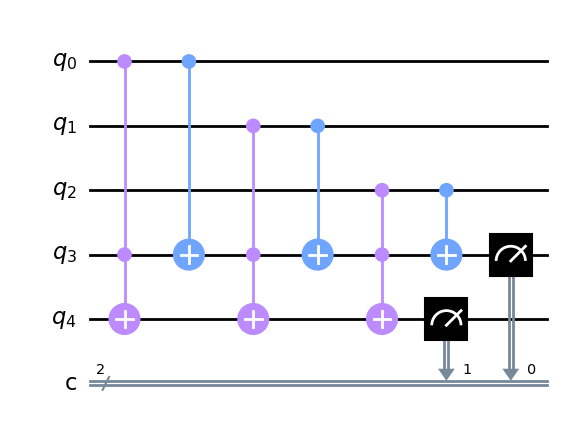


Input: 001
Sum according to the quantum circuit: 1


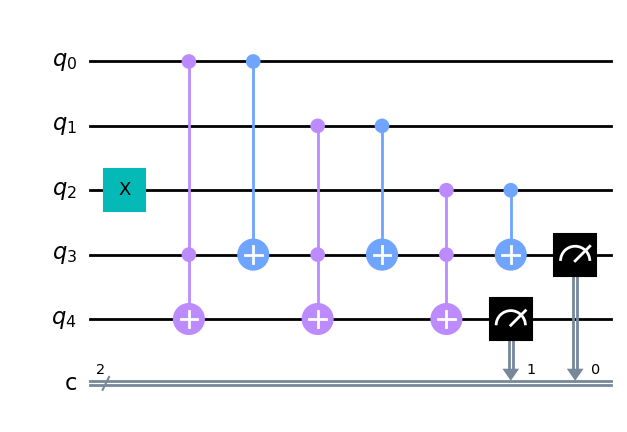


Input: 010
Sum according to the quantum circuit: 1


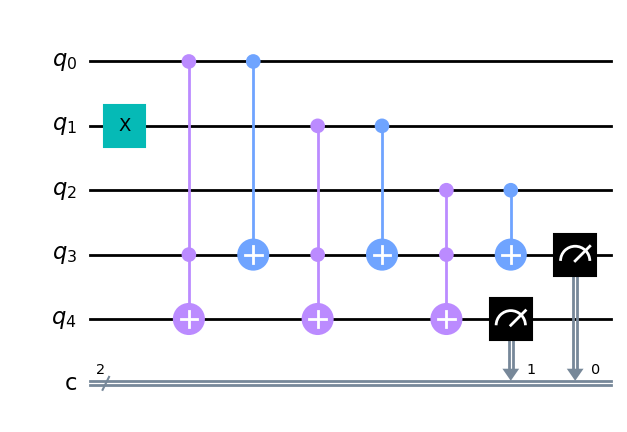


Input: 011
Sum according to the quantum circuit: 2


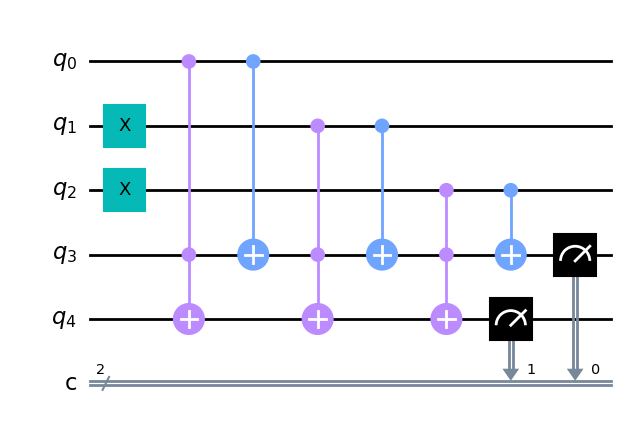


Input: 100
Sum according to the quantum circuit: 1


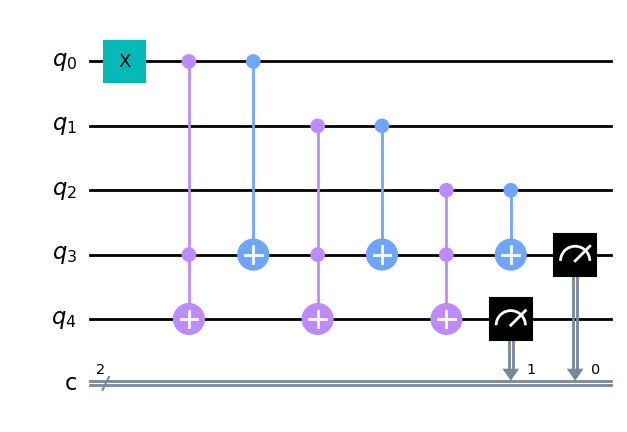


Input: 101
Sum according to the quantum circuit: 2


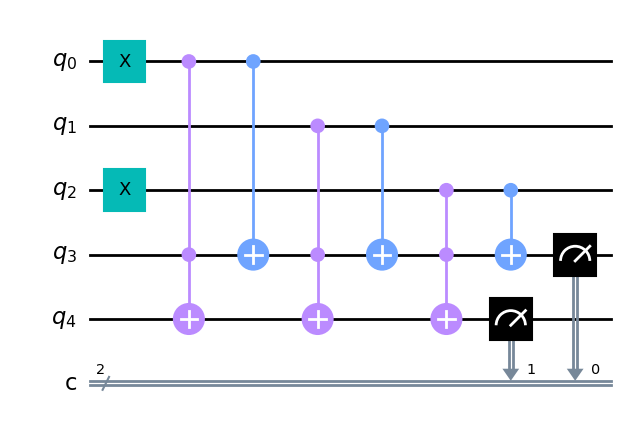


Input: 110
Sum according to the quantum circuit: 2


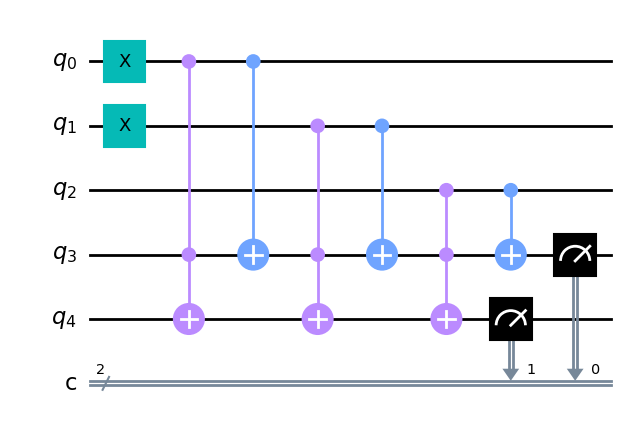


Input: 111
Sum according to the quantum circuit: 3


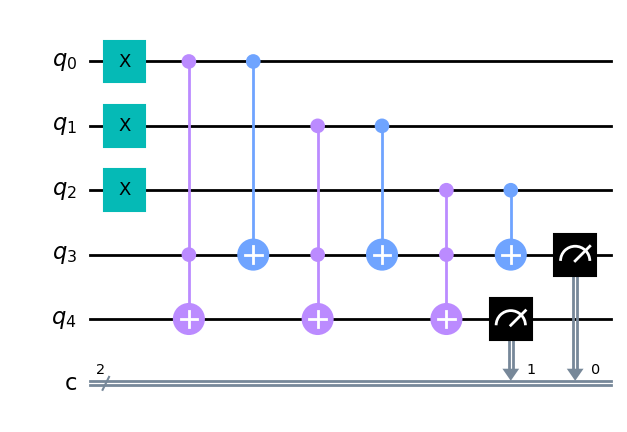

In [31]:
import qiskit
from qiskit import QuantumCircuit, Aer, execute
import matplotlib.pyplot as mpl


# Define input strings
inputs = ['000', '001', '010', '011', '100', '101', '110', '111']

# Define simulator
simulator = Aer.get_backend('qasm_simulator')

for input_str in inputs:
    # Create a quantum circuit
    qc = QuantumCircuit(5, 2)
    # Initialize qubits
    for i, bit in enumerate(input_str):
        if bit == '1':
            qc.x(i)
    
    # Add qubit 0
    qc.ccx(0, 3, 4)
    qc.cx(0, 3)
    
    # Add qubit 1
    qc.ccx(1, 3, 4)
    qc.cx(1, 3)
    
    # Add qubit 2
    qc.ccx(2, 3, 4)
    qc.cx(2, 3)
    
    # Measure sum and carry bits
    qc.measure(3,0)
    qc.measure(4,1)

    # Execute the circuit
    result = execute(qc, simulator, shots=1).result().get_counts(qc)
    
    #Print the results
    print("Input:", input_str)
    for key, value in result.items():
        bitval0= int(key[0])
        bitval1= int(key[1])
        sum_result = 2*bitval0 + 1* bitval1
    print("Sum according to the quantum circuit:", sum_result)
    
    # Print the circuit
    display(qc.draw(output='mpl'))
    print("")

#### Define a function that takes any arbitrary $n$ bit string and returns the sum of the bits, using quantum circuits

***Note that $n$ cannot be a very large number as the maximum number of qubits available on 'Aer' simulator is $25$. What is the maximum $n$ (number of bits) that can be added in this case and for this $n$ what is the circuit depth and width?***

In [ ]:
# your code here